In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import rich
print = rich.print
print("OpenCV version:", cv2.__version__)

OpenCV version: 4.8.0

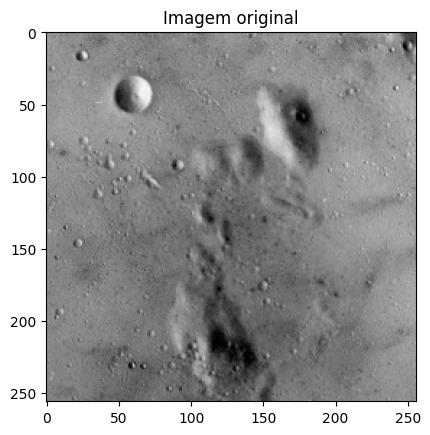

In [3]:
image = cv2.imread("./imgs/5.1.09.tiff")

plt.imshow(image)
plt.title("Imagem original")
plt.show()

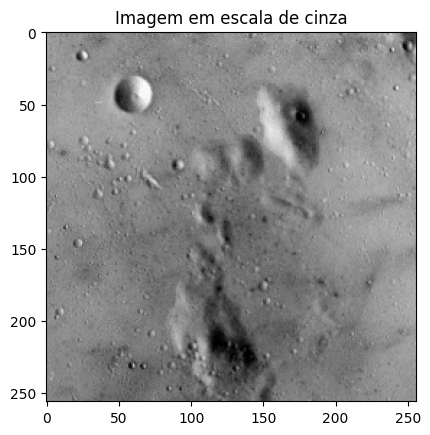

In [4]:
# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(gray, cmap="gray")
plt.title("Imagem em escala de cinza")
plt.show()

Kernel total: 277.361650444919

Kernel shape:
(9, 9)

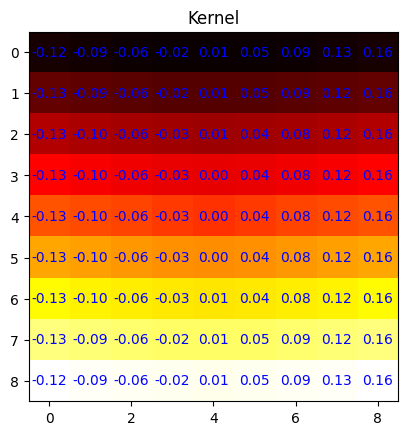

In [66]:
kernel_size = 9
f = lambda x,y : abs(np.sqrt(x **2 + y **2) + x * 10 )
kernel = np.ones((kernel_size, kernel_size), dtype="float")
for i in range(kernel_size):
    for j in range(kernel_size):
        x = i - kernel_size // 2
        y = j - kernel_size // 2
        kernel[i,j] = f(x,y)
kernel_total = np.sum(kernel) 
print("Kernel total:", kernel_total)
print("Kernel shape:", kernel.shape)
kernel = kernel / kernel_total

# plot kernel heatmap
plt.imshow(kernel, cmap="hot")
plt.title("Kernel")

# add numbers to heatmap
for i in range(kernel_size):
    for j in range(kernel_size):
        plt.text(i, j, f"{kernel[i,j]:.2f}", ha="center", va="center", color="blue")
plt.show()

In [67]:

width , height = gray.shape
k_width, k_height = kernel.shape
new_image = np.zeros((width+ k_width-1, height+ k_height-1)
, dtype="uint8")

sample_w = (k_width - 1) // 2
sample_h = (k_height - 1) // 2

for x in range(sample_w, width-sample_w):
    for y in range(sample_h, height-sample_h):
        img_sample = gray[
            x-sample_w:x+sample_w+1,
            y-sample_h:y+sample_h+1
        ]
        newpixel = img_sample*kernel
        new_image[x,y] = np.sum(newpixel)

new_image = new_image[sample_w:width-sample_w, sample_h:height-sample_h]

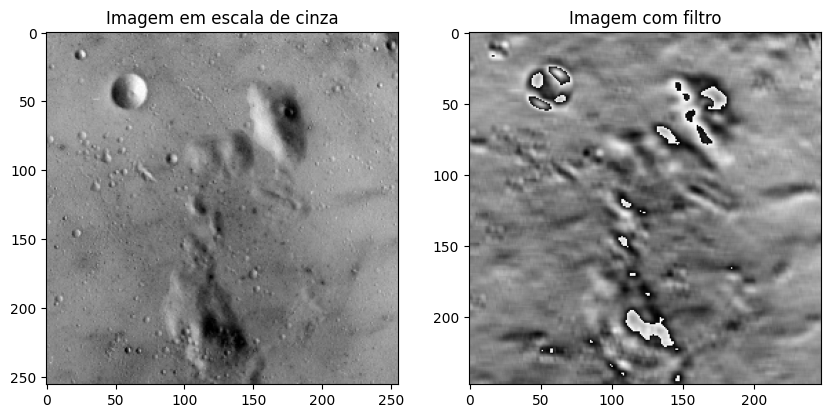

In [68]:
fig, axs = plt.subplots(1, 2, figsize=(10, 7))
axs[0].imshow(gray, cmap="gray")
axs[0].set_title("Imagem em escala de cinza")
axs[1].imshow(new_image, cmap="gray")
axs[1].set_title("Imagem com filtro")
plt.show()